In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


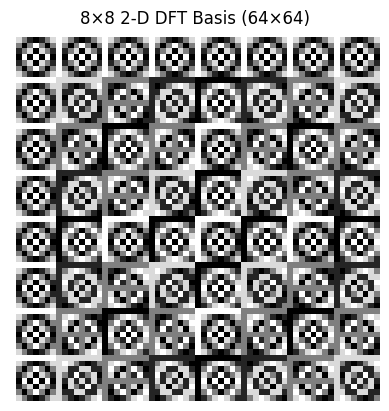

In [2]:
def generate_dft_basis(N=8):
    basis = np.zeros((N*N, N*N))

    idx = 0
    for u in range(N):
        for v in range(N):
            block = np.zeros((N, N))
            for x in range(N):
                for y in range(N):
                    block[x, y] = math.cos(
                        2 * math.pi * ((u * x + v * y) / N)
                    )
            basis[idx] = block.flatten()
            idx += 1

    return basis.reshape(N*8, N*8)


basis_image = generate_dft_basis()
plt.imshow(basis_image, cmap='gray')
plt.title("8×8 2-D DFT Basis (64×64)")
plt.axis("off")
plt.show()


Enter top-left x coordinate: 10
Enter top-left y coordinate: 10
Enter rectangle width: 20
Enter rectangle height: 10


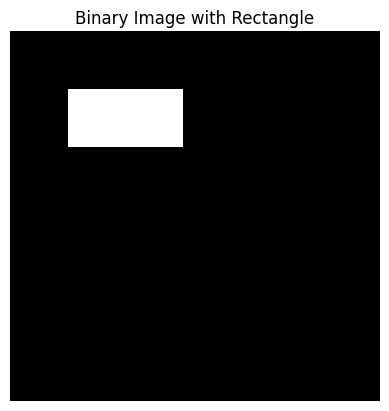

In [3]:
def create_rectangle_image():
    img = np.zeros((64, 64))

    x0 = int(input("Enter top-left x coordinate: "))
    y0 = int(input("Enter top-left y coordinate: "))
    width = int(input("Enter rectangle width: "))
    height = int(input("Enter rectangle height: "))

    img[x0:x0+height, y0:y0+width] = 1
    return img


image = create_rectangle_image()
plt.imshow(image, cmap='gray')
plt.title("Binary Image with Rectangle")
plt.axis("off")
plt.show()


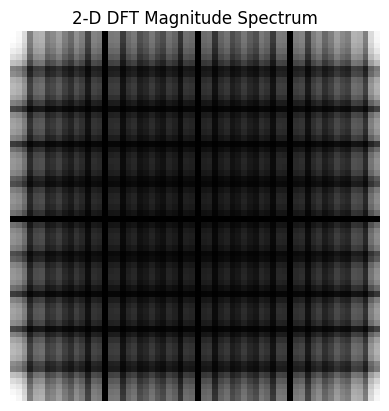

In [4]:
def dft_2d(image):
    M, N = image.shape
    F = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    angle = -2 * math.pi * ((u * x) / M + (v * y) / N)
                    sum_val += image[x, y] * complex(
                        math.cos(angle), math.sin(angle)
                    )
            F[u, v] = sum_val

    return F


F = dft_2d(image)
magnitude = np.log(1 + np.abs(F))

plt.imshow(magnitude, cmap='gray')
plt.title("2-D DFT Magnitude Spectrum")
plt.axis("off")
plt.show()


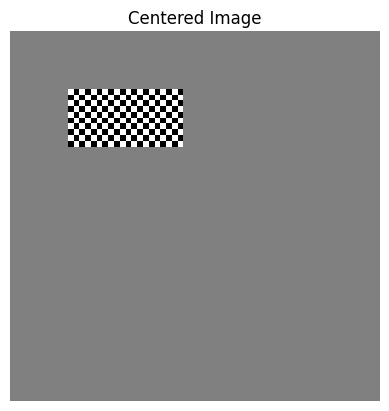

In [5]:
def center_image(image):
    M, N = image.shape
    centered = np.zeros_like(image)

    for x in range(M):
        for y in range(N):
            centered[x, y] = image[x, y] * ((-1) ** (x + y))

    return centered


centered_image = center_image(image)

plt.imshow(centered_image, cmap='gray')
plt.title("Centered Image")
plt.axis("off")
plt.show()


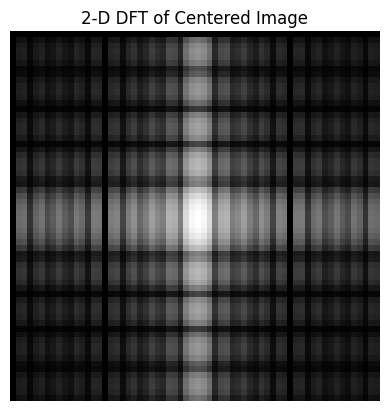

In [6]:
F_centered = dft_2d(centered_image)
magnitude_centered = np.log(1 + np.abs(F_centered))

plt.imshow(magnitude_centered, cmap='gray')
plt.title("2-D DFT of Centered Image")
plt.axis("off")
plt.show()
